# WHATSAPP GROUP CHAT ANALYSIS

This project involves the statistical analysis of the chats within the Computer Engineering students WhatsApp group of the University of Ilorin. 

## Packages and Libraries

The following libraries and packages will be used for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
import seaborn as sns
sns.set_style('darkgrid')
import re
import regex
import emoji
import plotly.express as px
from collections import Counter
import nltk 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import collections
import datetime
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

## Conversion of the text file exported from the chat to a pandas dataframe

In [83]:
def date_time(s):
    pattern = r'^\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def member(s):
    patterns = [
        '([\w]+):',                       
        '([\w]+[\s]+[\w]+):',              
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    
        '([+]\d{2} \d{3} \d{4}):',  
        '[\w]+ ?[^\s\u1f300-\u1f5ff]:',              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

def data_point(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if member(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [84]:
data = [] 

filename = 'WhatsApp Chat with CPE 2019.txt' 
with open(filename, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if date_time(line): 
            if len(messageBuffer) > 0: 
                data.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = data_point(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

## Loading the dataframe

In [126]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message'])
df["Date"] = pd.to_datetime(df["Date"])
print(df.shape)
df.head()

(39997, 4)


Date     Time Author  \
0 2022-01-03  1:40 PM   None   
1 2022-01-03  1:40 PM   None   
2 2022-01-03  1:41 PM   Lolu   
3 2022-01-03  1:41 PM   None   
4 2022-01-03  1:41 PM   None   

                                             Message  
0      +229 67 27 27 67: Ah extensive discoveries😂😂😂  
1                        +229 67 27 27 67: Swears🤣🤣🤣  
2                                    Another angle😂😂  
3  +234 805 105 0953: Na you wey con dey run thre...  
4                 +234 805 105 0953: <Media omitted>

## Exploratory Data Analysis

The `Author` is used to represent the names of the members of the GC. Here I retrieved all the names of the authors.

In [127]:
df['Author'].unique()

array([None, 'Lolu', 'Kingsley', 'Lanre', 'ViNe 69', 'Edward Rep',
       'Abdulmuiz', 'Abdulbasit', 'Aisha', 'Augustine', 'Abdulrahman Rep',
       'Tosin', 'Sadiq', 'Dapo Cpe', 'Ayodeji', 'Abraham', 'Akeem',
       'Solo Leveller', 'Abdulmalik', 'John 3:16', 'raqib', 'Abu',
       'Lanre:', 'Kenny', 'Ini CPE', 'Muhammad CPE', 'ViNe 69:', 'Lolu:',
       'Ini CPE:', 'John 3:16:', 'Edward Rep:', 'Kingsley:', 'Dapo Cpe:',
       'Aisha:', 'Sadiq:', 'Abu:', 'Solo Leveller:'], dtype=object)

In [128]:
df['Author'].value_counts()

Kingsley           6424
Tosin              5996
Lolu               3047
Lanre              2422
Abu                1702
Aisha              1621
ViNe 69            1559
Solo Leveller      1242
Abraham             950
Sadiq               501
Edward Rep          429
Akeem               417
Abdulmalik          402
Abdulrahman Rep     384
John 3:16           327
Augustine           285
Ini CPE             144
Dapo Cpe            120
Ayodeji              97
raqib                78
Abdulmuiz            72
Kenny                68
Abdulbasit           11
Abu:                  9
ViNe 69:              8
Muhammad CPE          8
Kingsley:             7
Lanre:                7
Solo Leveller:        6
Lolu:                 4
John 3:16:            2
Edward Rep:           2
Dapo Cpe:             2
Aisha:                2
Ini CPE:              1
Sadiq:                1
Name: Author, dtype: int64

Summary of the null values in the dataframe. Unfortunately, I don't have all the contacts of the authors. To maintain the integrity of this project, I would eliminate the details of the authors without a saved contact.

In [129]:
total = df.isnull().sum().sort_values(ascending=False)
p1 = df.isnull().sum()/df.isnull().count()*100
p2 = (np.round(p1, 1)).sort_values(ascending=False)
missing = pd.concat([total, p2], axis=1, keys=['Total', '%'])
missing.head()

Total     %
Author   11640  29.1
Date         0   0.0
Time         0   0.0
Message      0   0.0

I will also drop the authors with a semicolon on their names as they are without a message

In [130]:
to_drop = df.loc[df['Author'].isin(['ViNe 69:', 'Lolu:', 'Ini CPE:', 'John 3:16:', 'Edward Rep:', 'Kingsley:', 'Dapo Cpe:', 
                          'Aisha:', 'Sadiq:', 'Abu:', 'Solo Leveller:', 'Lanre:'])]
df.drop(to_drop.index, inplace=True)

In [131]:
# df['Message'].replace('', np.nan, regex=True)
# df['Message'].fillna(130, inplace=True)

In [134]:
df = df.dropna()
df.info()
print(df['Author'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28306 entries, 2 to 39994
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     28306 non-null  datetime64[ns]
 1   Time     28306 non-null  object        
 2   Author   28306 non-null  object        
 3   Message  28306 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ MB
['Lolu' 'Kingsley' 'Lanre' 'ViNe 69' 'Edward Rep' 'Abdulmuiz' 'Abdulbasit'
 'Aisha' 'Augustine' 'Abdulrahman Rep' 'Tosin' 'Sadiq' 'Dapo Cpe'
 'Ayodeji' 'Abraham' 'Akeem' 'Solo Leveller' 'Abdulmalik' 'John 3:16'
 'raqib' 'Abu' 'Kenny' 'Ini CPE' 'Muhammad CPE']


In [135]:
df.shape

(28306, 4)

The data has been processed and cleaned and is set for further analysis

## Stats

In [ ]:
def split_count(text):

    emoji_list = []
    data = re.findall(r'[^\s\u1f300-\u1f5ff]', text)
    for word in data:
        if any(char in emoji.distinct_emoji_list(text) for char in word):
            emoji_list.append(word)

    return emoji_list

total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

In [141]:
print("Stats")
print("Messages:", total_messages)
print("Media messages:", media_messages)
print("Emojis:", emojis)
print("Links:", links)

Stats
Messages: 28306
Media messages: 8967
Emojis: 12118
Links: 112


In the group chat, there included 28306 messages, 8967 media messages, 12118 emojis and 112 links

## Group Members Stats

In [142]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))

l = messages_df.Author.unique()

for i in range(len(l)): 
    req_df = messages_df[messages_df["Author"] == l[i]]
    print(f'Stats of {l[i]} -')

    print('Messages Sent', req_df.shape[0])

    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Words per message', words_per_message)

    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)

    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)

    links = sum(req_df["urlcount"])   
    print('Links Sent', links);print()

Stats of Lolu -
Messages Sent 2491
Words per message 8.103171417101565
Media Messages Sent 556
Emojis Sent 1970
Links Sent 36

Stats of Kingsley -
Messages Sent 4241
Words per message 6.444470643716104
Media Messages Sent 2183
Emojis Sent 1454
Links Sent 8

Stats of Lanre -
Messages Sent 1601
Words per message 4.6814490943160525
Media Messages Sent 821
Emojis Sent 188
Links Sent 2

Stats of ViNe 69 -
Messages Sent 1257
Words per message 6.232299124900557
Media Messages Sent 302
Emojis Sent 193
Links Sent 14

Stats of Edward Rep -
Messages Sent 279
Words per message 13.397849462365592
Media Messages Sent 150
Emojis Sent 302
Links Sent 10

Stats of Abdulmuiz -
Messages Sent 46
Words per message 4.369565217391305
Media Messages Sent 26
Emojis Sent 30
Links Sent 0

Stats of Abdulbasit -
Messages Sent 8
Words per message 17.875
Media Messages Sent 3
Emojis Sent 3
Links Sent 0

Stats of Aisha -
Messages Sent 1013
Words per message 9.884501480750247
Media Messages Sent 608
Emojis Sent 1013
Li

In [145]:
average_message_words = messages_df['Word_Count'].mean()
average_message_letters = messages_df['Letter_Count'].mean()
average_message_day = messages_df.groupby('Date')['Message'].count().mean()
print('Average Words per Messages', round(average_message_words, 2))
print('Average Letters per Messages', round(average_message_letters, 2))
print('Average Message per Day', round(average_message_day, 2))

Average Words per Messages 6.39
Average Letters per Messages 32.64
Average Message per Day 80.92


## Frequently used words

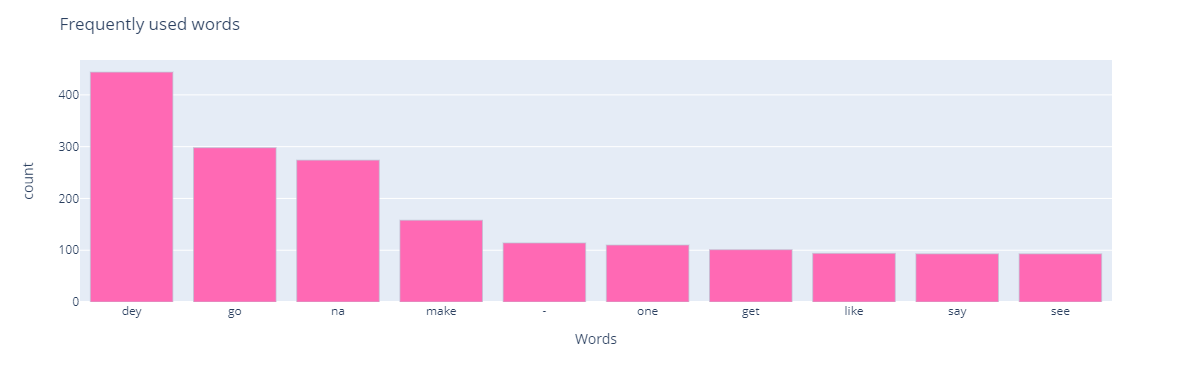

In [146]:
common = messages_df[['Author','Message']].copy()

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update('<Media', 'omitted>')

stopwords = list(STOPWORDS)
common["Message"] = (common["Message"]
                           .str.lower()
                           .str.split()
                           .apply(lambda x: [item for item in x if item not in stopwords])
                           .explode()
                           .reset_index(drop=True)
                 )

words_dict = dict(Counter(common.Message))
words_dict = sorted(words_dict.items(), key=lambda x: x[1], reverse=True)

words_dict = pd.DataFrame(words_dict, columns=['words', 'count'])

fig = px.bar(words_dict.head(10).dropna(), x='words', y='count',
                 labels={'words':'Words'}, 
                 height=200)
fig.update_traces(marker_color='hotpink', marker_line_color='#B7C5D3')
fig.update_layout(title_text='Frequently used words')
fig.show()

## Emojis

In [147]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(collections.Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['Emoji', 'No of appearances'])
emoji_df

Emoji  No of appearances
0       😂               6950
1       😭               1624
2       😹                328
3       🥲                325
4       🔥                260
..    ...                ...
152     💰                  1
153     😻                  1
154     🥶                  1
155     😇                  1
156     🏀                  1

[157 rows x 2 columns]

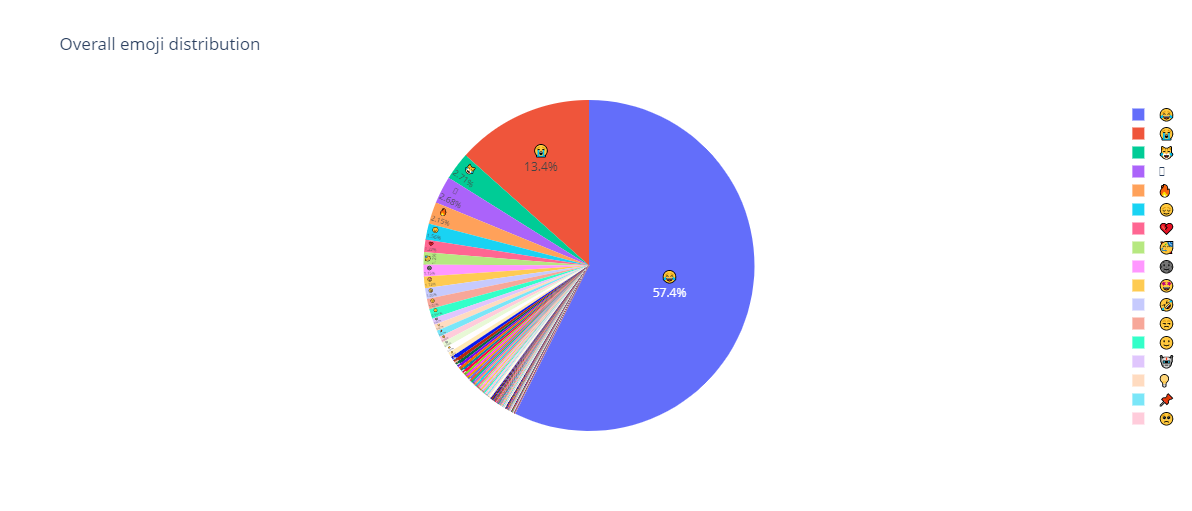

<Figure size 720x576 with 0 Axes>

In [148]:
plt.figure(figsize=(10, 8))
fig = px.pie(emoji_df, values='No of appearances', names='Emoji', title='Overall emoji distribution', width=800, height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

The laughing emoji was used 57% of the time. seems the group is filled with happy folks😂.

Next, I'll analyze the use of emoji per Author.

Emoji Distribution for Lolu


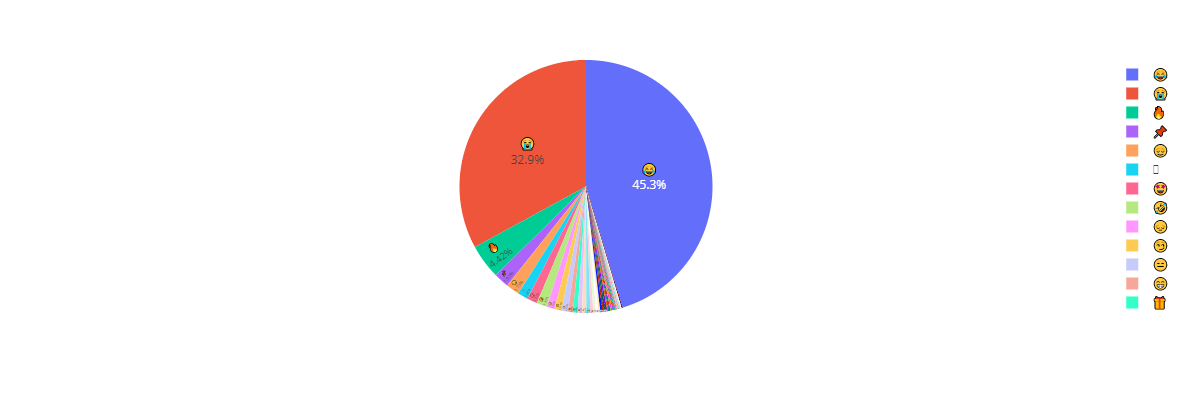

Emoji Distribution for Kingsley


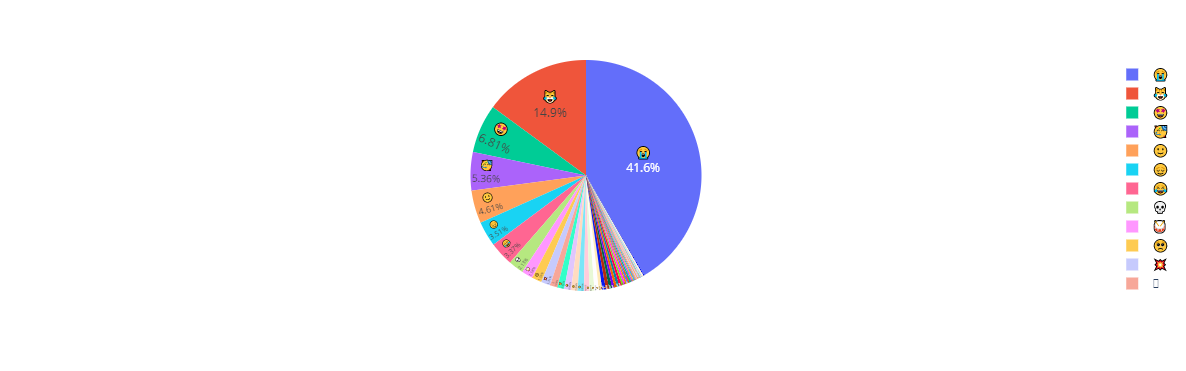

Emoji Distribution for Lanre


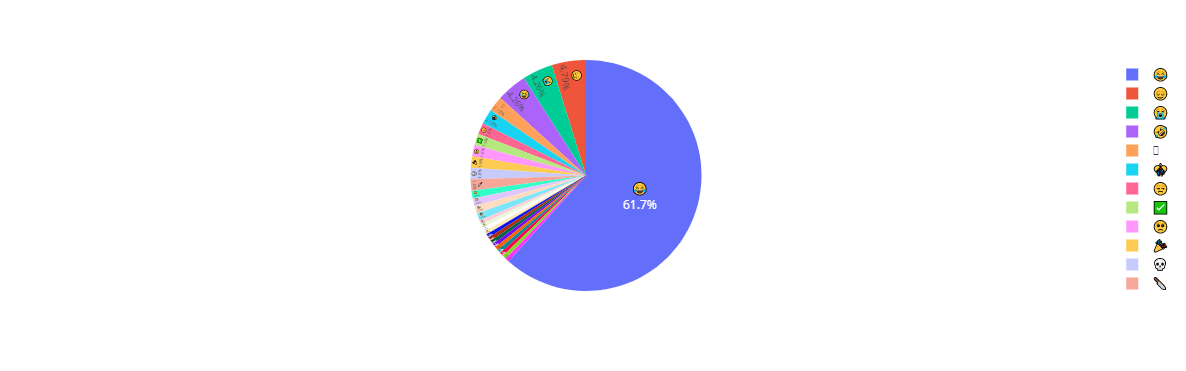

Emoji Distribution for ViNe 69


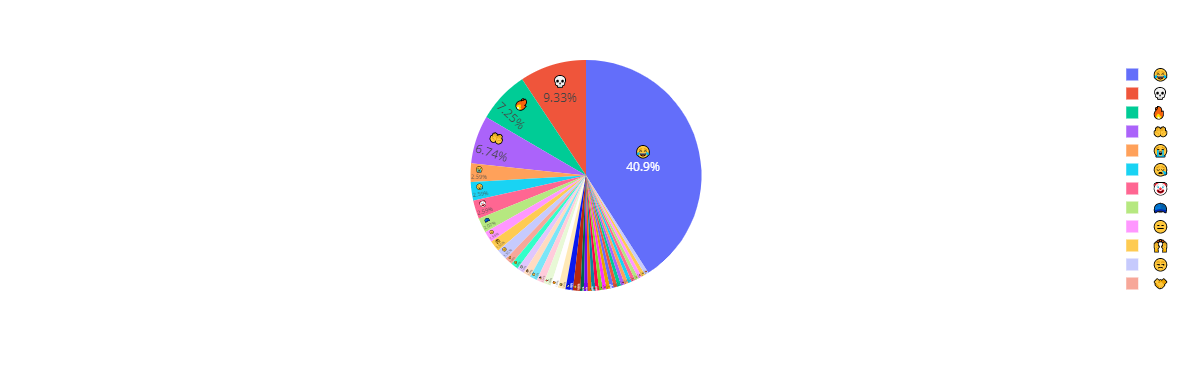

Emoji Distribution for Edward Rep


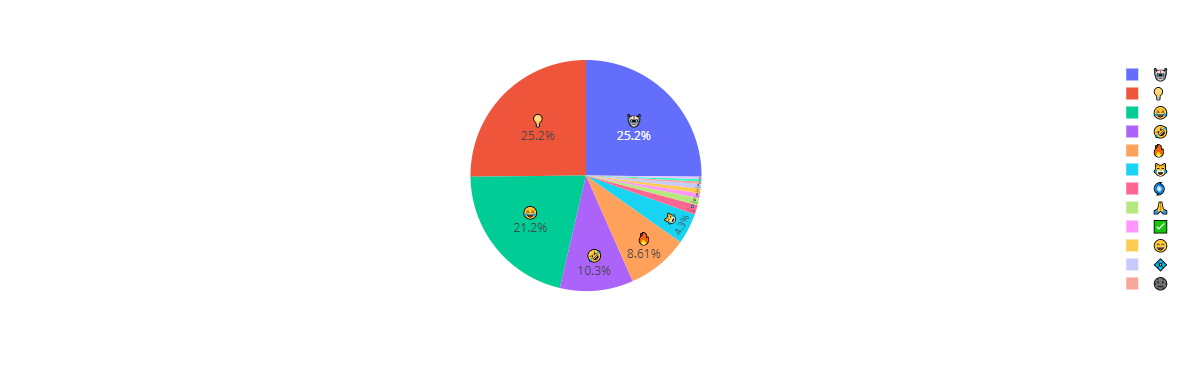

Emoji Distribution for Abdulmuiz


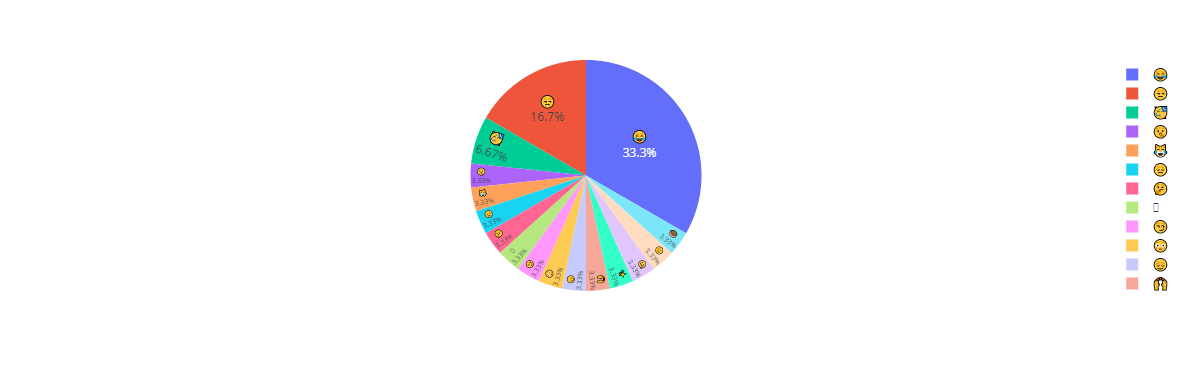

Emoji Distribution for Abdulbasit


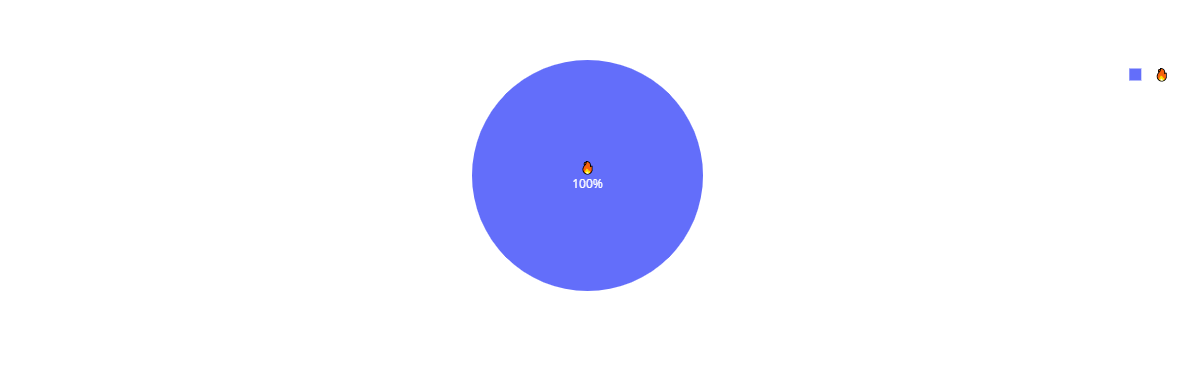

Emoji Distribution for Aisha


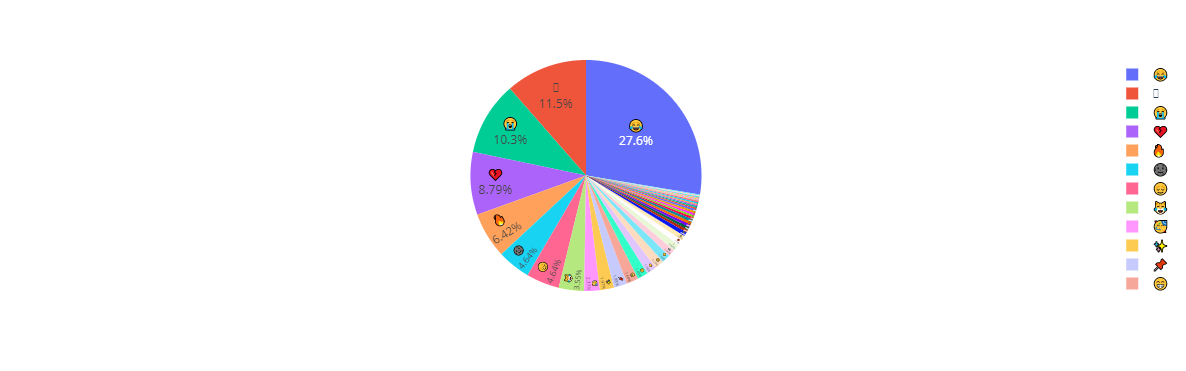

Emoji Distribution for Abdulrahman Rep


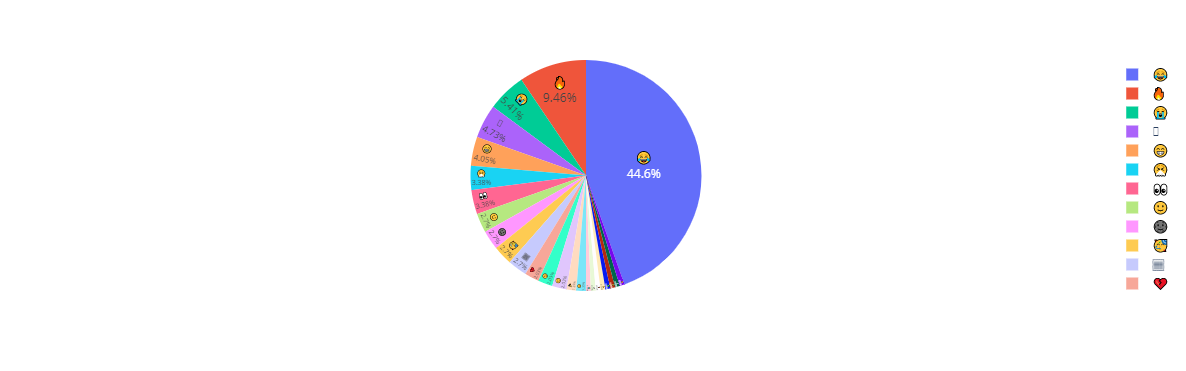

Emoji Distribution for Tosin


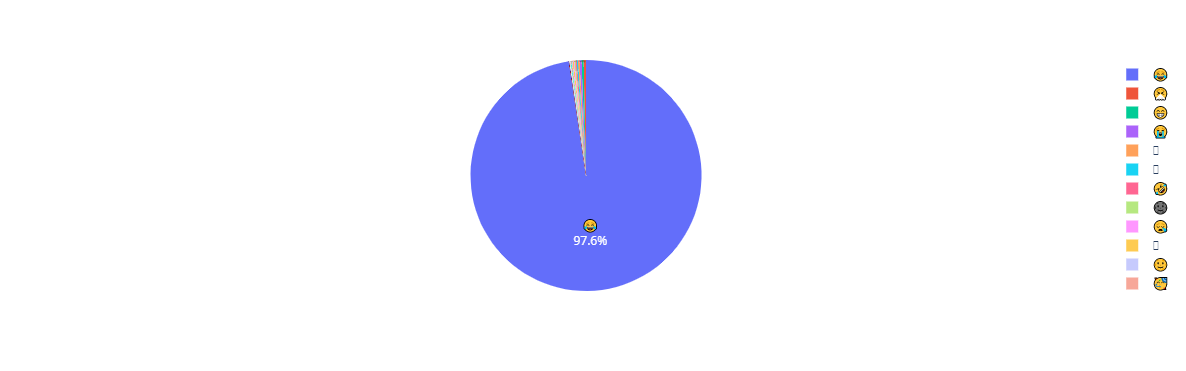

Emoji Distribution for Sadiq


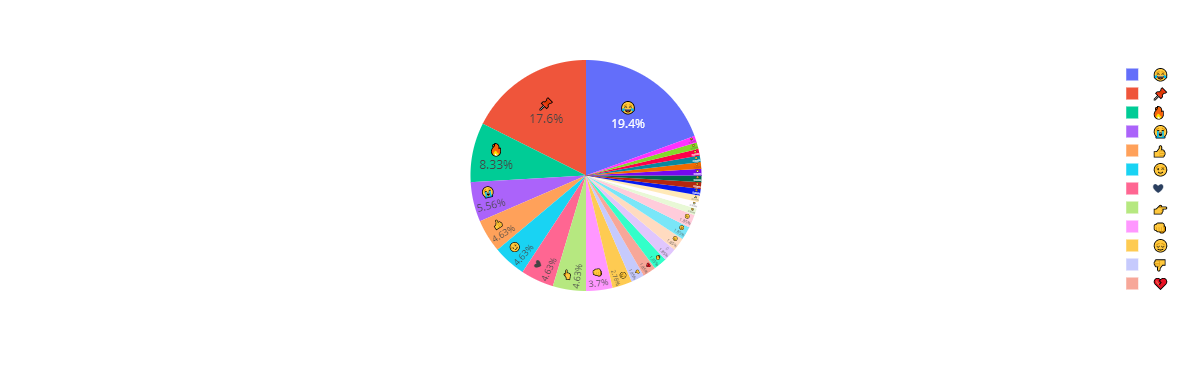

Emoji Distribution for Dapo Cpe


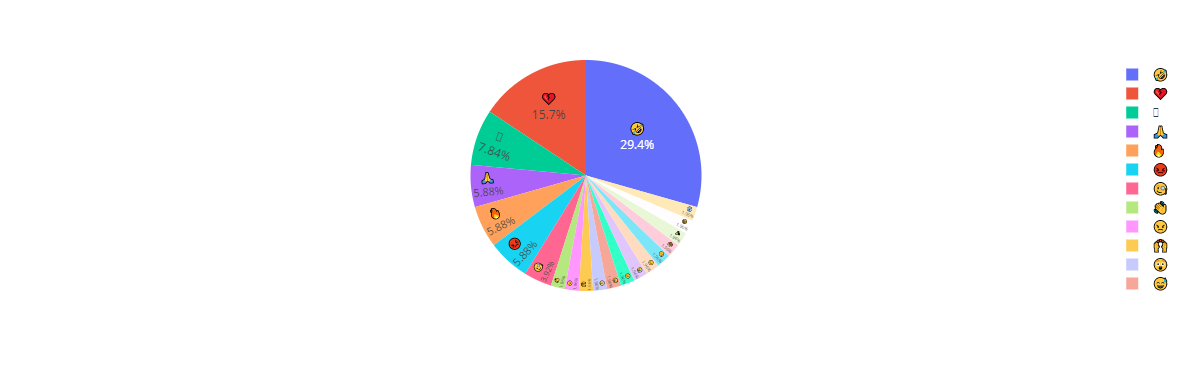

Emoji Distribution for Augustine


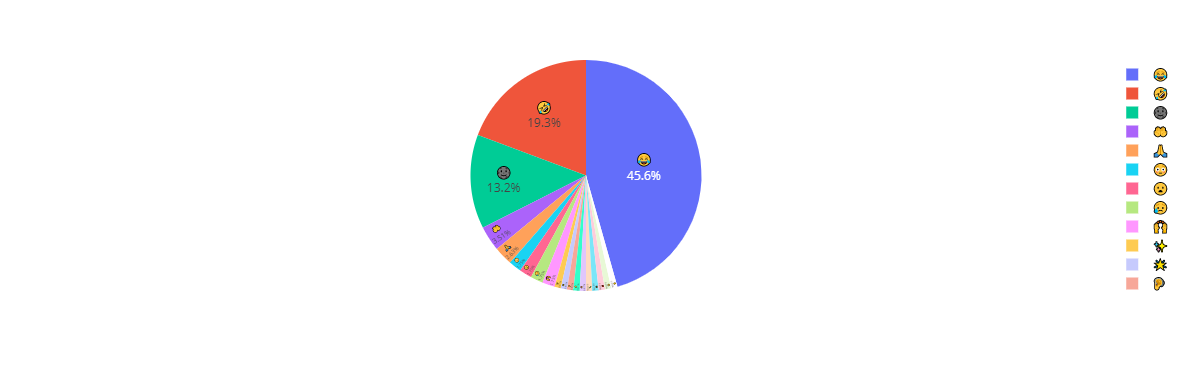

Emoji Distribution for Ayodeji


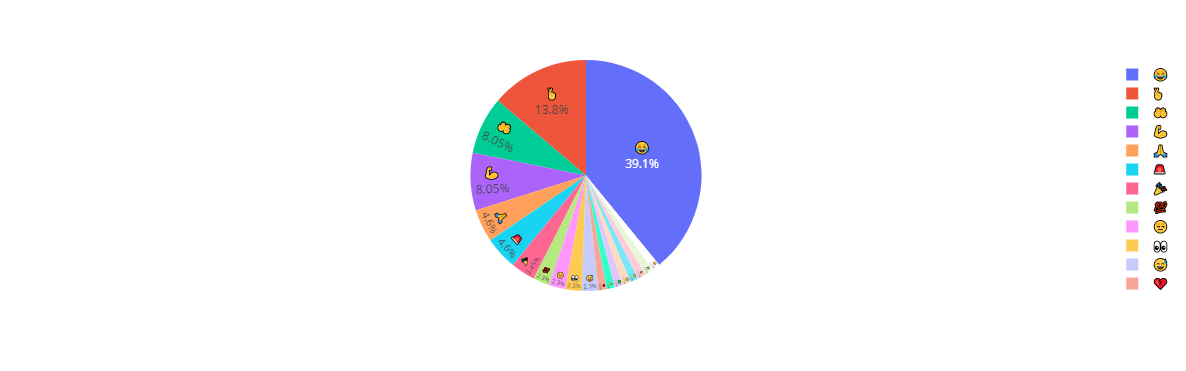

Emoji Distribution for Abraham


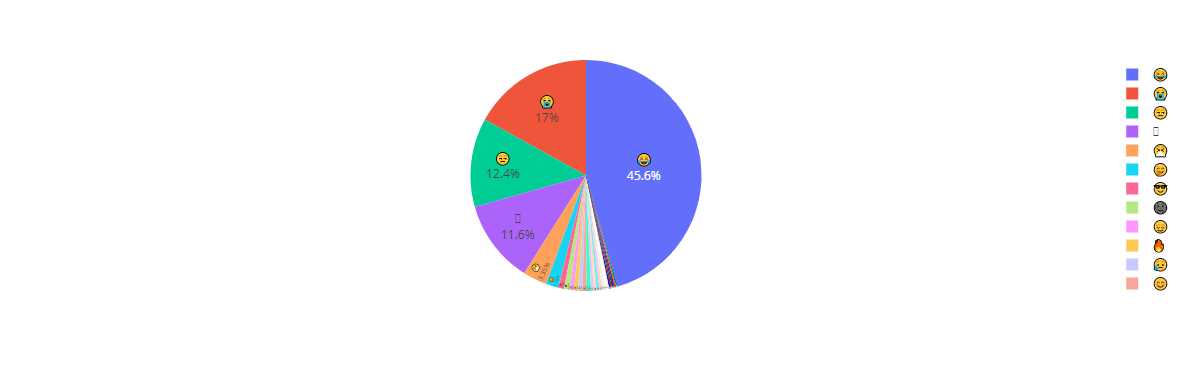

Emoji Distribution for Akeem


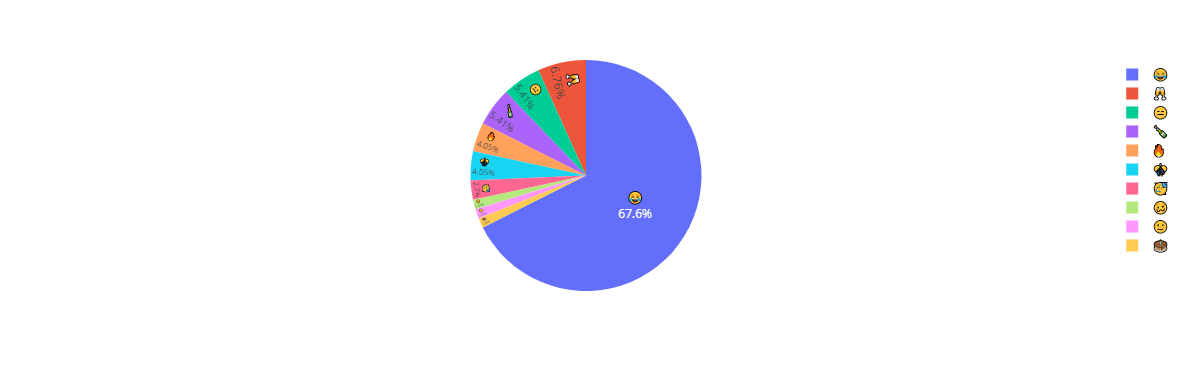

Emoji Distribution for Solo Leveller


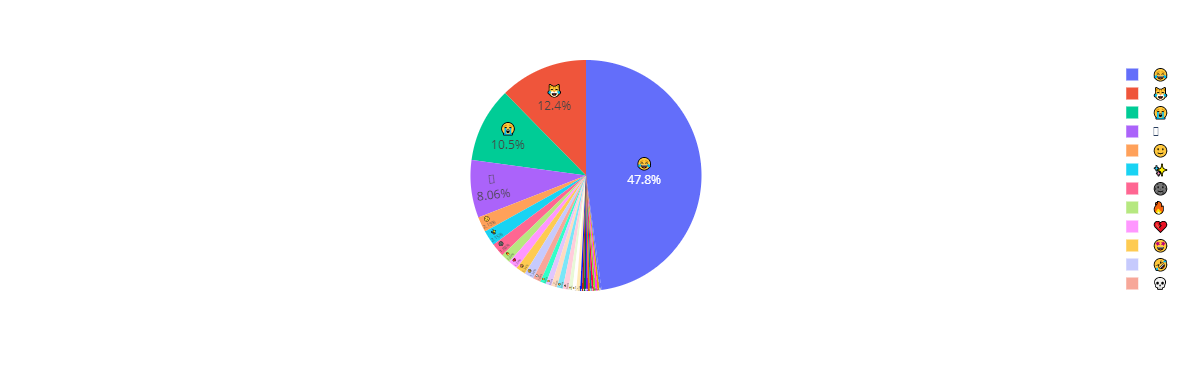

Emoji Distribution for Abdulmalik


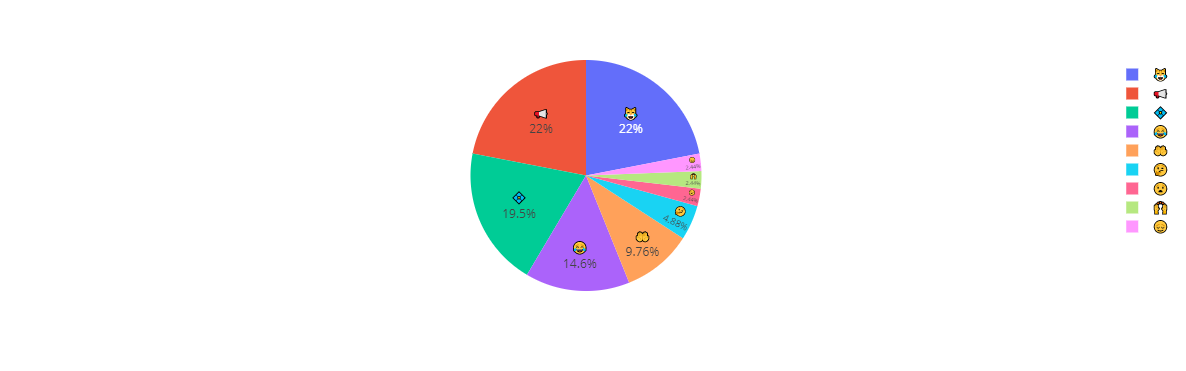

Emoji Distribution for John 3:16


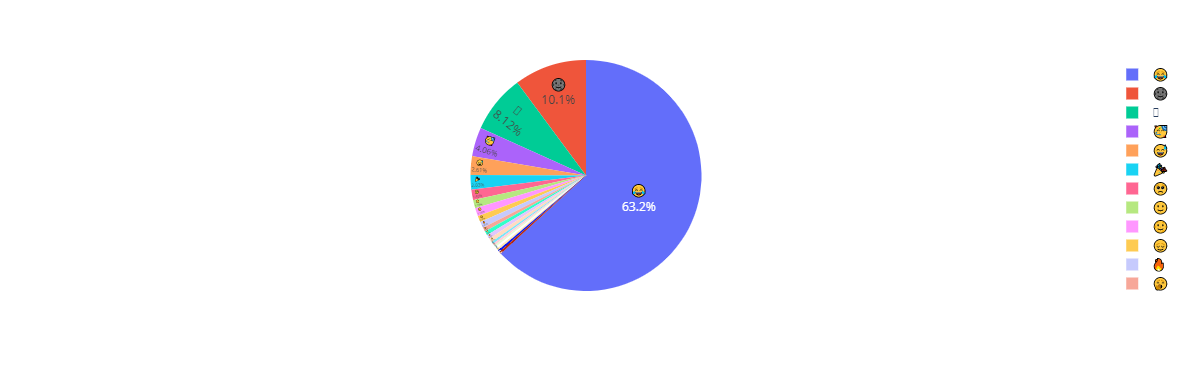

Emoji Distribution for Abu


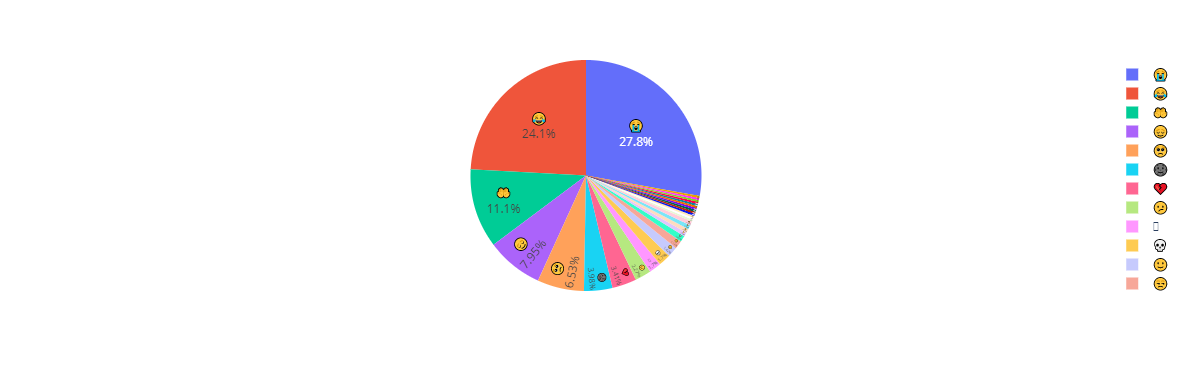

Emoji Distribution for Kenny


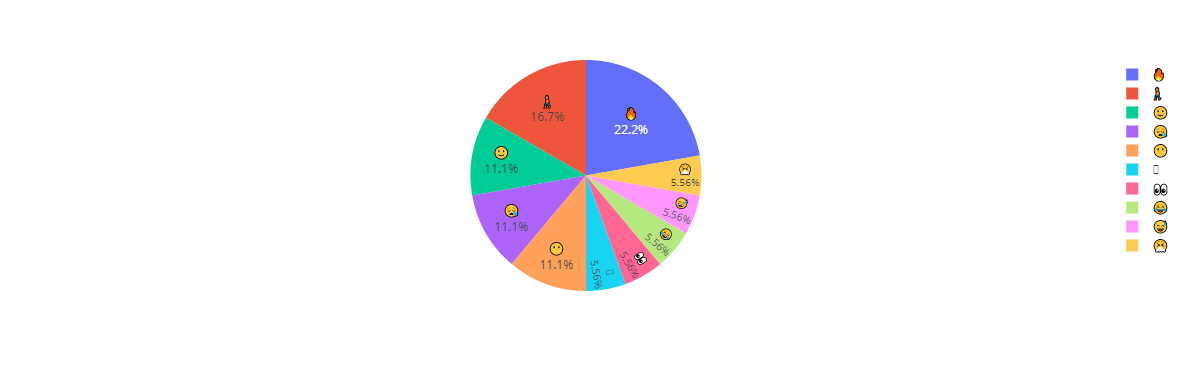

Emoji Distribution for Ini CPE


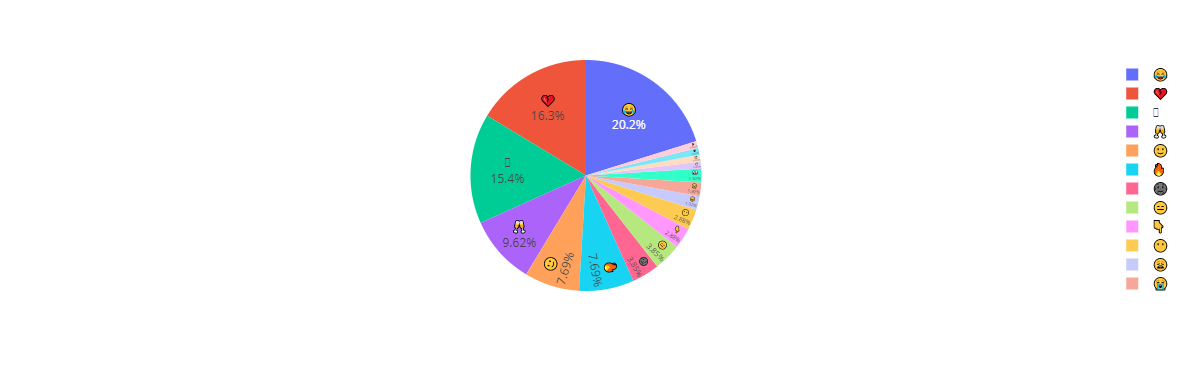

Emoji Distribution for Muhammad CPE


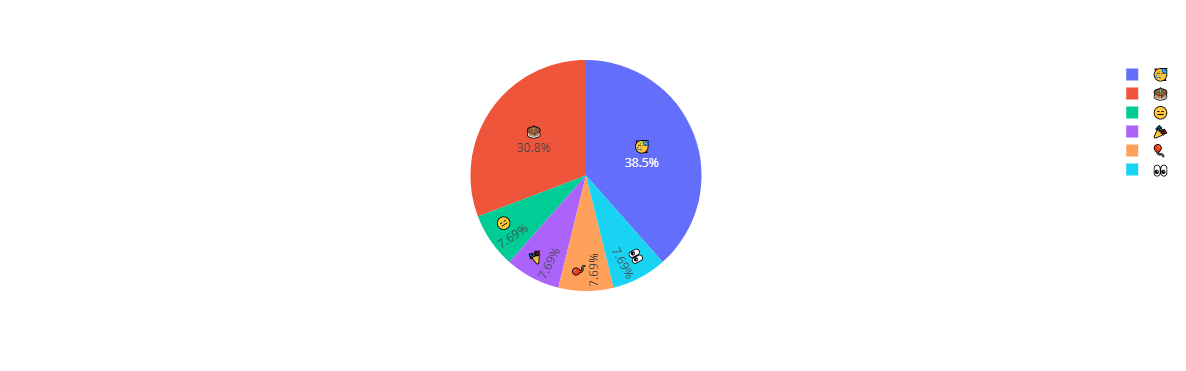

Emoji Distribution for raqib


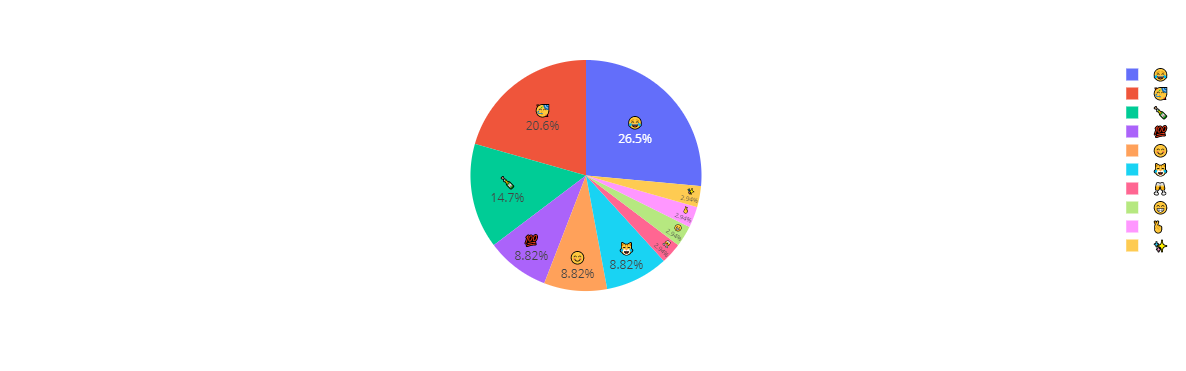

In [149]:
l = messages_df.Author.unique()
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    total_emojis_list = list([a for b in dummy_df.emoji for a in b])
    emoji_dict = dict(collections.Counter(total_emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    print('Emoji Distribution for', l[i])
    author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
    fig = px.pie(author_emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

## WordCloud

The wordcloud is used to understand the general feeling in the group. Media omitted indicates media messages.

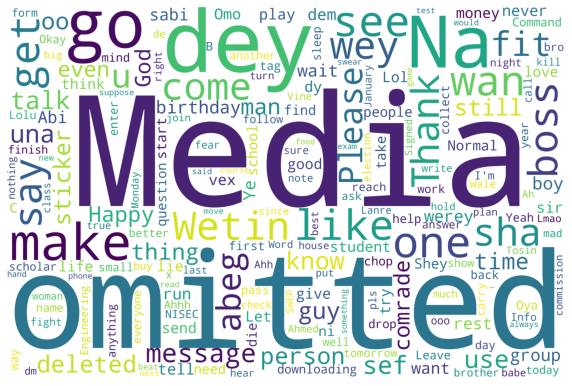

In [151]:
def word_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
    
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df_word_cloud = df[['Message']].copy()
df_word_cloud['Message']= df_word_cloud['Message'].apply(remove_urls)
df_word_cloud['Message']= df_word_cloud['Message'].replace('nan', np.NaN)
df_word_cloud['Message']= df_word_cloud['Message'].replace('', np.NaN)
text = " ".join(review for review in df_word_cloud.Message.dropna())
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', 
                      collocations=False,stopwords = stopwords).generate(text)
word_cloud(wordcloud)

## Days with the Highest Number of Messages

Text(0, 0.5, 'Date')

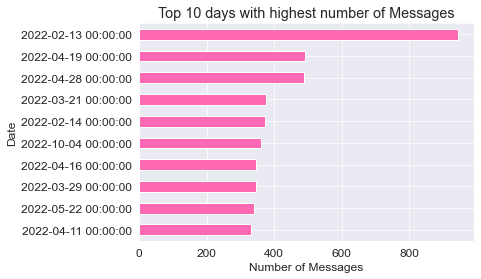

In [155]:
messages_df['Date'].value_counts().head(10).sort_values(ascending=True).plot.barh(color='hotpink')
plt.title('Top 10 days with highest number of Messages')
plt.xlabel('Number of Messages')
plt.ylabel('Date')

Over 1000 messages was sent on 13th of February 2022, the highest of any day

## Most Active Days in the Group

C:\Users\user\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



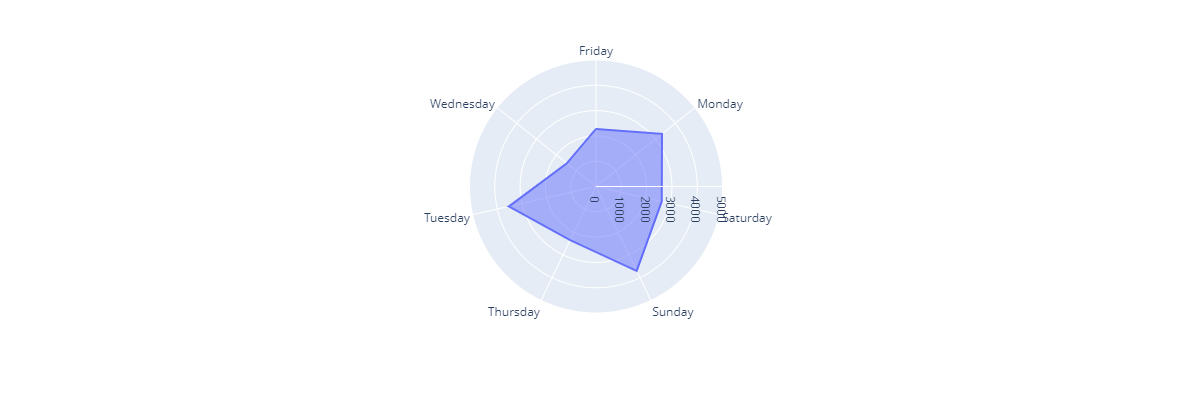

In [156]:
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)


fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,5000]
    )),
  showlegend=False
)

fig.show()

Tuesday turns out to be the most active day in  the group

## Chats over specific periods

In [157]:
date_df = messages_df.groupby("Date").sum()

Text(0.5, 1.0, 'Chats over a time period')

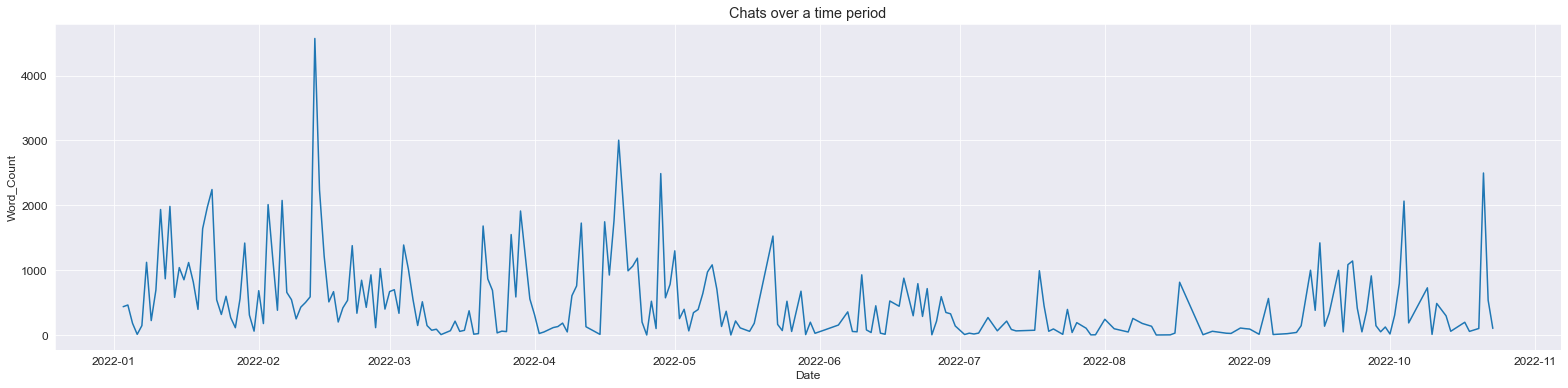

In [158]:
plt.figure(figsize=(27, 6))
sns.lineplot(data=date_df, x="Date", y="Word_Count")
plt.title('Chats over a time period')

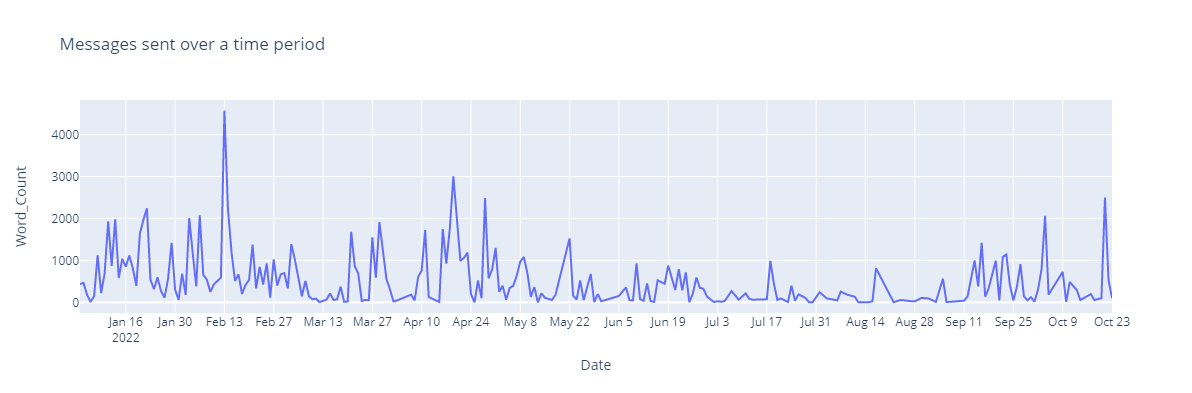

In [159]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="Word_Count", title='Messages sent over a time period')
fig.update_xaxes(nticks=20)
fig.show()

## The most active times in the group

Text(0, 0.5, 'Time')

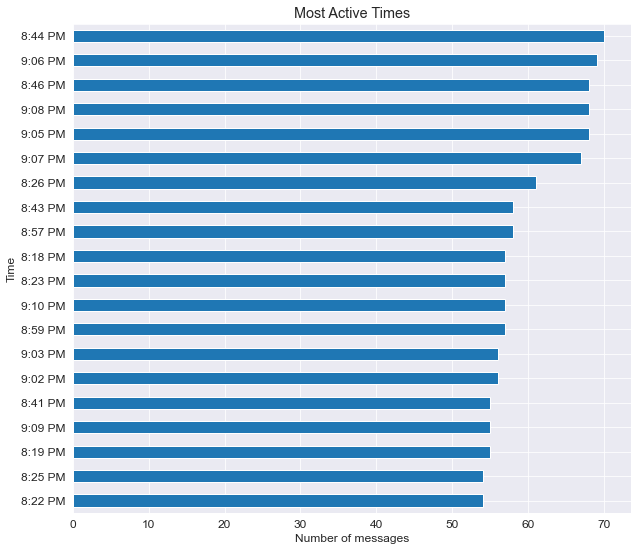

In [163]:
plt.figure(figsize=(10, 9))
plt.title('Most Active Times')
messages_df['Time'].value_counts().head(20).sort_values(ascending=True).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Time')

70 messages are being sent by 8:44 PM in the group, the most of anytime of the day. Interestingly, fewer messages are sent during the daytime

## The most active days in the group

Text(0, 0.5, 'Day')

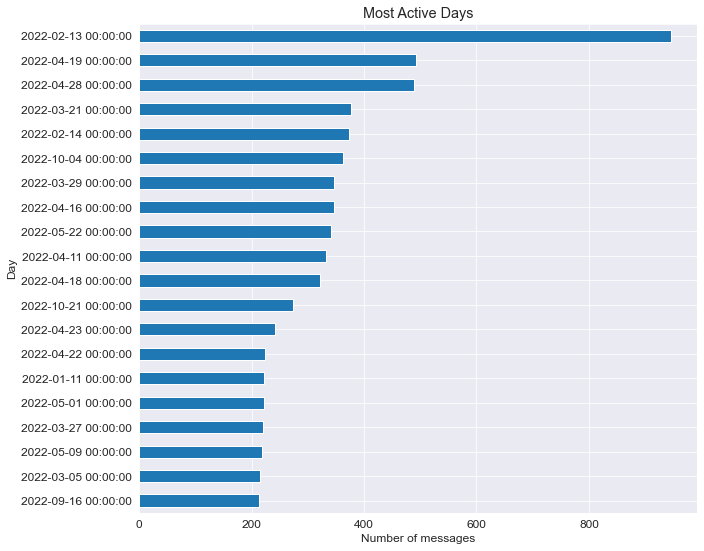

In [165]:
plt.figure(figsize=(10, 9))
plt.title('Most Active Days')
messages_df['Date'].value_counts().head(20).sort_values(ascending=True).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Day')

## The most active group members

Text(0, 0.5, 'No of Messages')

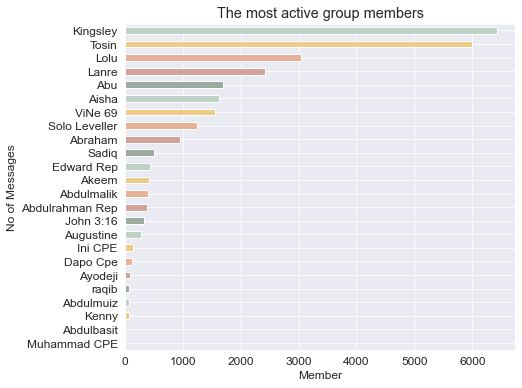

In [175]:
df['Author'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(7,6), color=['#D4A29C', '#E8B298', '#EDCC8B', '#BDD1C5', '#9DAAA2'])
plt.title('The most active group members')
plt.xlabel('Member')
plt.ylabel('No of Messages')

Kingsley is by far the most active group member having sent a whooping 6424 messages. UNREAL!!!

## Messages sent per day

<AxesSubplot:xlabel='Date'>

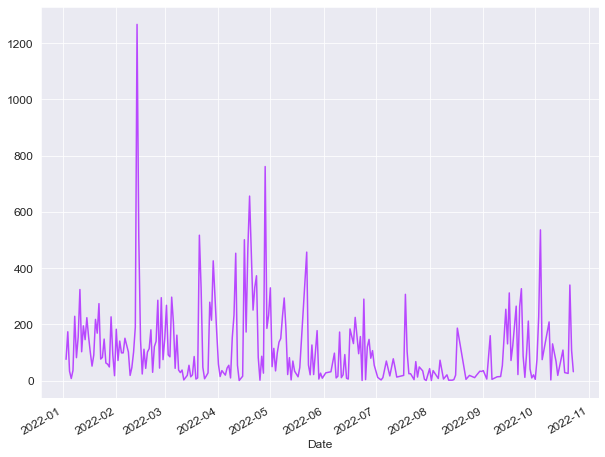

In [179]:
num_per_day = df.groupby('Date')['Message'].count().plot(kind='line', color='#B848FF', figsize=(10, 8))
num_per_day

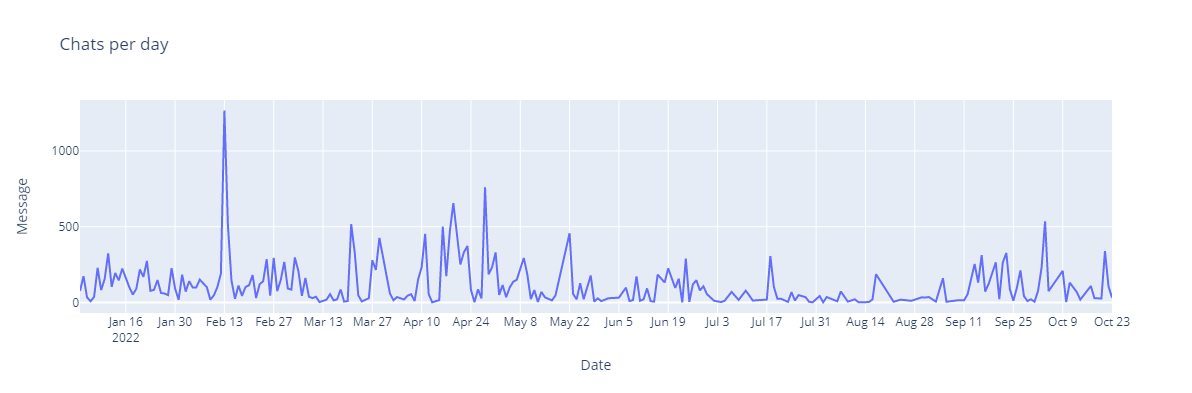

In [180]:
num_per_day = df.groupby('Date')['Message'].count()

fig = px.line(num_per_day, y="Message", title='Chats per day')
fig.update_xaxes(nticks=20)
fig.show()

So, here comes the end of the analysis of my school's WhatsApp group chat. From the analysis, I have gained a lot of insights regarding the group. It was interesting and fun doing this.